In [2]:
import cv2
import matplotlib.pyplot as plt
import os
import time
import numpy as np
from os.path import isfile, join
%matplotlib inline

In [4]:
file_path = "D:\\2011_09_26_drive_0001_extract\\2011_09_26\\2011_09_26_drive_0001_extract\\image_03\\data\\"
path, dirs, files = next(os.walk(file_path))
#file_count = len(files)
images = []
for img in files:
    images.append(cv2.imread(file_path+img))

In [2]:
def simulate_image_stream(image, period):
    time.sleep(period)
    return image

In [10]:
new_file_path = "D:\\2011_09_26_drive_0001_extract\\2011_09_26\\2011_09_26_drive_0001_extract\\image_02\\data\\"
path2, dirs2, files2 = next(os.walk(new_file_path))
new_images = []
for img in files2:
    new_images.append(cv2.imread(new_file_path+img))

In [3]:
def convert_frames_to_video(pathIn,pathOut,fps):
    frame_array = []
    files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
 
    #for sorting the file names properly
    files.sort(key = lambda x: int(x[5:-4]))
 
    for i in range(len(files)):
        filename=pathIn + files[i]
        #reading each files
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        print(filename)
        #inserting the frames into an image array
        frame_array.append(img)
 
    out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
 
    for i in range(len(frame_array)):
        # writing to a image array
        out.write(frame_array[i])
    out.release()

In [11]:
fps = 25
pathOut = new_file_path + "video.avi"
convert_frames_to_video(new_file_path,pathOut , fps)

D:\2011_09_26_drive_0001_extract\2011_09_26\2011_09_26_drive_0001_extract\image_02\data\0000000000.png
D:\2011_09_26_drive_0001_extract\2011_09_26\2011_09_26_drive_0001_extract\image_02\data\0000000001.png
D:\2011_09_26_drive_0001_extract\2011_09_26\2011_09_26_drive_0001_extract\image_02\data\0000000002.png
D:\2011_09_26_drive_0001_extract\2011_09_26\2011_09_26_drive_0001_extract\image_02\data\0000000003.png
D:\2011_09_26_drive_0001_extract\2011_09_26\2011_09_26_drive_0001_extract\image_02\data\0000000004.png
D:\2011_09_26_drive_0001_extract\2011_09_26\2011_09_26_drive_0001_extract\image_02\data\0000000005.png
D:\2011_09_26_drive_0001_extract\2011_09_26\2011_09_26_drive_0001_extract\image_02\data\0000000006.png
D:\2011_09_26_drive_0001_extract\2011_09_26\2011_09_26_drive_0001_extract\image_02\data\0000000007.png
D:\2011_09_26_drive_0001_extract\2011_09_26\2011_09_26_drive_0001_extract\image_02\data\0000000008.png
D:\2011_09_26_drive_0001_extract\2011_09_26\2011_09_26_drive_0001_extract

D:\2011_09_26_drive_0001_extract\2011_09_26\2011_09_26_drive_0001_extract\image_02\data\0000000080.png
D:\2011_09_26_drive_0001_extract\2011_09_26\2011_09_26_drive_0001_extract\image_02\data\0000000081.png
D:\2011_09_26_drive_0001_extract\2011_09_26\2011_09_26_drive_0001_extract\image_02\data\0000000082.png
D:\2011_09_26_drive_0001_extract\2011_09_26\2011_09_26_drive_0001_extract\image_02\data\0000000083.png
D:\2011_09_26_drive_0001_extract\2011_09_26\2011_09_26_drive_0001_extract\image_02\data\0000000084.png
D:\2011_09_26_drive_0001_extract\2011_09_26\2011_09_26_drive_0001_extract\image_02\data\0000000085.png
D:\2011_09_26_drive_0001_extract\2011_09_26\2011_09_26_drive_0001_extract\image_02\data\0000000086.png
D:\2011_09_26_drive_0001_extract\2011_09_26\2011_09_26_drive_0001_extract\image_02\data\0000000087.png
D:\2011_09_26_drive_0001_extract\2011_09_26\2011_09_26_drive_0001_extract\image_02\data\0000000088.png
D:\2011_09_26_drive_0001_extract\2011_09_26\2011_09_26_drive_0001_extract

In [12]:
import pandas as pd

In [24]:
time_stamp_file_path = "D:\\2011_09_26_drive_0001_extract\\2011_09_26\\2011_09_26_drive_0001_extract\\image_03\\timestamps.txt"
df = pd.read_table(time_stamp_file_path)

In [25]:
df.head()

,2011-09-26 13:02:25.445761280
0,2011-09-26 13:02:25.548891904
1,2011-09-26 13:02:25.651908608
2,2011-09-26 13:02:25.755030016
3,2011-09-26 13:02:25.858035712
4,2011-09-26 13:02:25.961178112


In [26]:
df['date'], df['timestamps'] = df['2011-09-26 13:02:25.445761280'].str.split(' ', 1).str

KeyError: 0

In [34]:
data = []
data.insert(0, {'date': '2011-09-26', 'timestamps':'13:02:25.445761280'})

In [36]:
#df = df.drop('2011-09-26 13:02:25.445761280', 1)
df = pd.concat([pd.DataFrame(data), df], ignore_index=True)

In [176]:
timestamps = pd.to_timedelta(df['timestamps'], unit = 's')
#print(timestamps)

In [169]:
time_stamp_file_path2 = "D:\\2011_09_26_drive_0001_extract\\2011_09_26\\2011_09_26_drive_0001_extract\\velodyne_points\\timestamps.txt"
df2 = pd.read_table(time_stamp_file_path2)
df2['date'], df2['timestamps'] = df2['2011-09-26 13:02:25.745054743'].str.split(' ', 1).str
df2 = df2.drop('2011-09-26 13:02:25.745054743', 1)
data2 = []
data2.insert(0, {'date': '2011-09-26', 'timestamps':'13:02:25.745054743'})
df2 = pd.concat([pd.DataFrame(data2), df2], ignore_index=True)

In [170]:
timestamps2 = pd.to_timedelta(df2['timestamps'], unit = 's')

In [173]:
difftimestamps = timestamps2 - timestamps

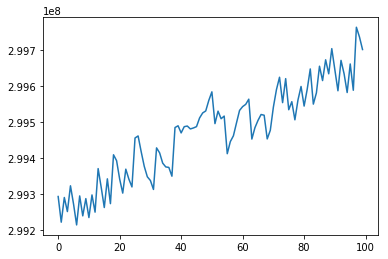

In [189]:
plt.plot(difftimestamps[:100].values)

In [146]:
newsy_time_stamp_file_path = "D:\\2011_09_26_drive_0001_sync\\2011_09_26\\2011_09_26_drive_0001_sync\\image_02\\timestamps.txt"
df3 = pd.read_table(newsy_time_stamp_file_path)

In [147]:
df3['date'], df3['timestamps'] = df3['2011-09-26 13:02:25.961661696'].str.split(' ', 1).str
df3 = df3.drop('2011-09-26 13:02:25.961661696', 1)
data3 = []
data3.insert(0, {'date': '2011-09-26', 'timestamps':'13:02:25.961661696'})
df3 = pd.concat([pd.DataFrame(data3), df3], ignore_index=True)

In [148]:
df3.head()

,date,timestamps
0,2011-09-26,13:02:25.961661696
1,2011-09-26,13:02:26.064785152
2,2011-09-26,13:02:26.167923456
3,2011-09-26,13:02:26.270924032
4,2011-09-26,13:02:26.374087680


In [149]:
timestamps3 = pd.to_timedelta(df3['timestamps'], unit = 's')

In [177]:
news_time_stamp_file_path = "D:\\2011_09_26_drive_0001_sync\\2011_09_26\\2011_09_26_drive_0001_sync\\velodyne_points\\timestamps.txt"
df4 = pd.read_table(news_time_stamp_file_path)

In [178]:
df4['date'], df4['timestamps'] = df4['2011-09-26 13:02:25.951199337'].str.split(' ', 1).str
df4 = df4.drop('2011-09-26 13:02:25.951199337', 1)
data4 = []
data4.insert(0, {'date': '2011-09-26', 'timestamps':'13:02:25.951199337'})
df4 = pd.concat([pd.DataFrame(data4), df4], ignore_index=True)

In [179]:
df4.head()

,date,timestamps
0,2011-09-26,13:02:25.951199337
1,2011-09-26,13:02:26.054281661
2,2011-09-26,13:02:26.157358891
3,2011-09-26,13:02:26.260450684
4,2011-09-26,13:02:26.363515608


In [180]:
timestamps4 = pd.to_timedelta(df4['timestamps'], unit = 's')

In [181]:
difftimestamps2 = timestamps3 - timestamps4

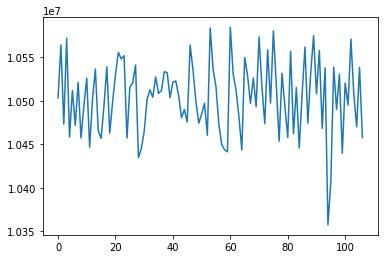

In [186]:
plt.plot(difftimestamps2[1:].values)

In [187]:
diffdiff = difftimestamps - difftimestamps2

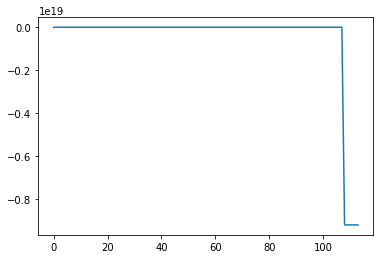

In [188]:
plt.plot(diffdiff)